In [1]:

import os
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import torch.nn as nn
import torchvision.models as models
from torch.autograd import Variable
import pandas as pd
from sklearn.metrics import confusion_matrix  


data_dir = os.path.join("./", "TrainTest")

In [2]:
resnet18 = models.resnet18(pretrained=True)
modules=list(resnet18.children())[:-1]
resnet18=nn.Sequential(*modules)
for p in resnet18.parameters():
    p.requires_grad = False;

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0)

image_features = np.zeros((513, 1))

resnet18.eval()
 
with torch.no_grad():
    for data in dataloader: 
        image, label = data
        encoding = resnet18(image) 

        encoding_np = encoding.numpy()
        label = label.numpy()

        encoding_np = encoding_np.reshape(1, 512)
        encoding_np = np.append(encoding_np, label)
        encoding_np = encoding_np.reshape(513, 1)

        image_features = np.append(image_features, encoding_np, axis=1)
        

        

# drop first row of zeros
image_features_df = pd.DataFrame(image_features)
image_features_df = image_features_df.iloc[:, 1:]
print(image_features_df)

         1         2         3         4         5         6         7     \
0    0.271029  0.431391  0.189157  0.181322  0.557895  0.397117  0.978485   
1    0.208780  0.269095  0.248151  0.431158  0.148965  0.217442  0.109632   
2    0.152388  0.121084  0.175657  0.183613  0.297226  0.328614  0.289818   
3    1.255197  1.369295  1.353558  1.435808  1.440755  1.390105  1.360685   
4    0.453387  0.165390  0.167985  0.244700  0.265388  0.243067  0.192398   
..        ...       ...       ...       ...       ...       ...       ...   
508  0.308011  0.352928  0.213455  0.158261  0.234878  0.336584  0.409897   
509  1.168912  1.118458  0.870525  1.115834  1.566571  1.275556  1.559748   
510  0.035456  0.044374  0.115242  0.108024  0.074112  0.043260  0.099155   
511  0.235910  0.135839  0.084740  0.225783  0.155173  0.068174  0.044899   
512  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         8         9         10    ...      1946      1947      1948  \
0  

In [4]:
image_features_df_T = image_features_df.T
image_features_df_T = pd.DataFrame(image_features_df_T)
labels = image_features_df_T.iloc[:, 512]
print(labels.shape)
print(image_features_df_T.shape)

(1955,)
(1955, 513)


In [5]:
feature_set_x = image_features_df_T.iloc[:, :512]
print(feature_set_x.shape)

(1955, 512)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(feature_set_x, labels, stratify = labels, test_size=0.3)

model = LogisticRegressionCV()
model.fit(X_train, y_train)
s = model.score(X_test, y_test)

y_pred = model.predict(X_test)


#Obtained Accuracy
print("The score of the model is: ", s)


/Users/anusharao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anusharao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/anusharao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anusharao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

The score of the model is:  0.9318568994889267


[[160  16]
 [ 24 387]]


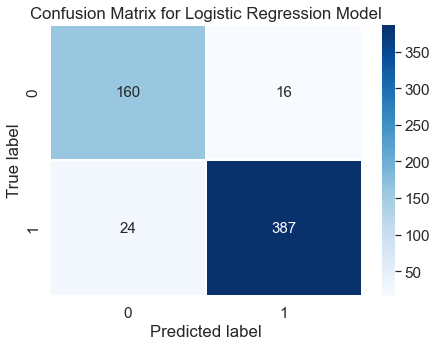

In [8]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Blues, linewidths=0.2,fmt='g')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

Model AUC Score = 0.978


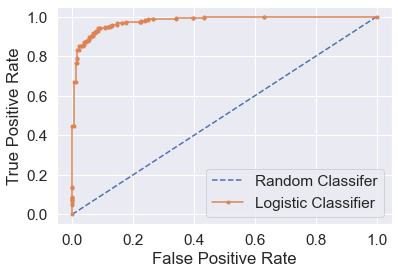

In [9]:
#ROC and AUC for Classifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

no_proba = [0 for _ in range(len(y_test))]


auc = roc_auc_score(y_test, y_pred_proba)
print('Model AUC Score = %.3f' % (auc))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
fpr_1, tpr_1, thresholds = roc_curve(y_test, no_proba)

plt.plot(fpr_1, tpr_1, linestyle='--', label='Random Classifer')
plt.plot(fpr, tpr, marker='.', label='Logistic Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Model AUC Score = 0.978
Best Threshold=1.000000


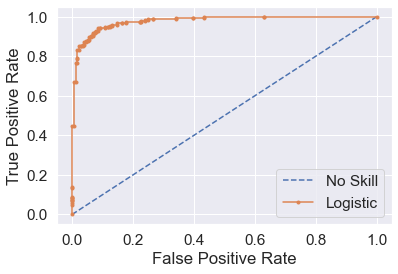

In [29]:
#Finding Optimal Threshold: J-Statistic

from sklearn.metrics import roc_auc_score
import math

#y_pred_proba = y_pred_proba[:, 1]


auc_2 = roc_auc_score(y_test, y_pred_proba)
print('Model AUC Score = %.3f' % (auc_2))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
fpr_1, tpr_1, thresholds = roc_curve(y_test, no_proba)

j_stat = []

for f, b in zip(fpr, tpr):
    j = b - f
    j_stat.append(x)
    
# locate the index of the largest g-mean
ix = np.argmax(j_stat)

best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

plt.plot(fpr_1, tpr_1, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
#Finding Optimal Threshold

from sklearn.metrics import roc_auc_score
import math

#y_pred_proba = y_pred_proba[:, 1]


auc_2 = roc_auc_score(y_test, y_pred_proba)
print('Model AUC Score = %.3f' % (auc_2))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
fpr_1, tpr_1, thresholds = roc_curve(y_test, no_proba)

gmeans = []
# calculate the g-mean for each threshold       
for f, b in zip(fpr, tpr):
    x = math.sqrt((b * (1-f)))
    gmeans.append(x)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print(thresholds)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.plot(fpr_1, tpr_1, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()